<a href="https://colab.research.google.com/github/athp18/pytorch_experiments/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An implementation of an Autoencoder for generating synthetic images of digits using the MNIST dataset.

An Autoencoder is a neural network used for unsupervised learning of efficient codings -- the idea is to learn an encoding of the data by training the network to avoid signal noise. An Autoencoder consists of three parts:

- An encoder, which compresses the input data into a latent-space representation.
- A bottleneck, which prevents information from flowing from the encoder to the decoder.
- A decoder, which reconstructs the input data from its latent-space representation.

This autoencoder has 784 neurons, for 28x28 MNIST images flattened into a one-dimensional vector. The architecture is as follows:

- **Input Layer**: 784 neurons (for 28x28 pixel MNIST images flattened into a vector).
- **Encoder**:
 - Hidden Layer 1: 128 neurons with ReLU activation.
 - Hidden Layer 2: 64 neurons with ReLU activation.
 - Code Layer (Latent Space): 32 neurons with ReLU activation.
- **Decoder**:
  - Hidden Layer 3: 64 neurons with ReLU activation.
  - Hidden Layer 4: 128 neurons with ReLU activation.
  - Output Layer: 784 neurons with sigmoid activation.

Mathematically, we can represent the architecture like this:

### 1. Layer 1 (Encoder)

$$
h_1 = \text{ReLU}\left( x W_1 + b_1 \right)
$$

### 2. Layer 2 (Encoder)

$$
h_2 = \text{ReLU}\left( h_1 W_2 + b_2 \right)
$$

### 3. Code Layer

$$
c = \text{ReLU}\left( h_2 W_3 + b_3 \right)
$$

### 4. Layer 3 (Decoder)

$$
h_3 = \text{ReLU}\left( c W_4 + b_4 \right)
$$

### 5. Layer 4 (Decoder)

$$
h_4 = \text{ReLU}\left( h_3 W_5 + b_5 \right)
$$

### 6. Output Layer

$$
\hat{x} = \sigma\left( h_4 W_6 + b_6 \right)
$$


In [ ]:
!git clone https://github.com/athp18/pytorch_experiments.git

Cloning into 'pytorch_experiments'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 37.76 KiB | 666.00 KiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
%cd pytorch_experiments

/content/pytorch_experiments/pytorch_experiments/pytorch_experiments


In [ ]:
!ls

autoencoder.py	gan.py	naive_bayes.py	README.md  utils.py


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16092399.27it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 483421.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4427624.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 12632976.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Step [0/938], Loss: 0.2308
Epoch [1/5], Step [100/938], Loss: 0.0735
Epoch [1/5], Step [200/938], Loss: 0.0673
Epoch [1/5], Step [300/938], Loss: 0.0672
Epoch [1/5], Step [400/938], Loss: 0.0682
Epoch [1/5], Step [500/938], Loss: 0.0752
Epoch [1/5], Step [600/938], Loss: 0.0660
Epoch [1/5], Step [700/938], Loss: 0.0676
Epoch [1/5], Step [800/938], Loss: 0.0656
Epoch [1/5], Step [900/938], Loss: 0.0652
Epoch [1/5] completed with average loss: 0.0804


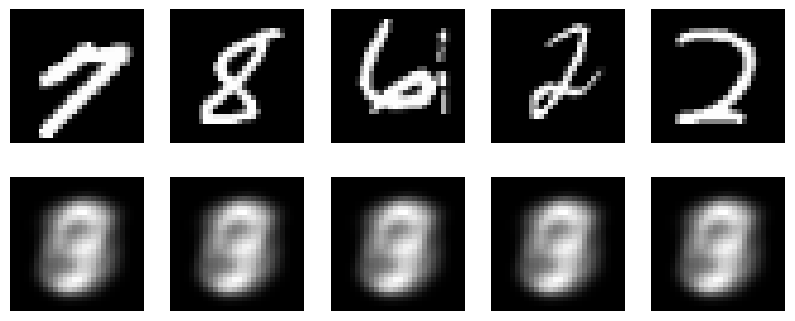

Epoch [2/5], Step [0/938], Loss: 0.0676
Epoch [2/5], Step [100/938], Loss: 0.0621
Epoch [2/5], Step [200/938], Loss: 0.0668
Epoch [2/5], Step [300/938], Loss: 0.0670
Epoch [2/5], Step [400/938], Loss: 0.0619
Epoch [2/5], Step [500/938], Loss: 0.0635
Epoch [2/5], Step [600/938], Loss: 0.0653
Epoch [2/5], Step [700/938], Loss: 0.0652
Epoch [2/5], Step [800/938], Loss: 0.0594
Epoch [2/5], Step [900/938], Loss: 0.0620
Epoch [2/5] completed with average loss: 0.0641


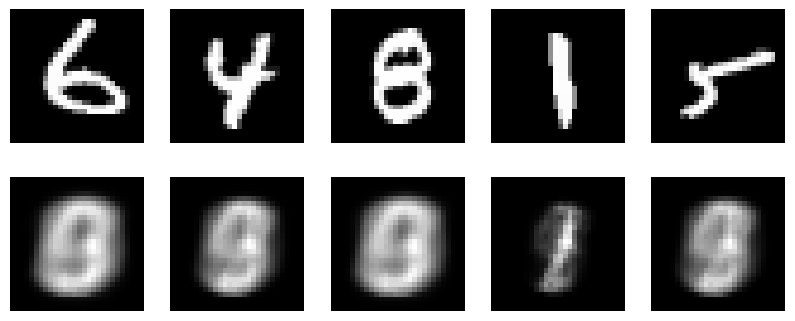

Epoch [3/5], Step [0/938], Loss: 0.0628
Epoch [3/5], Step [100/938], Loss: 0.0635
Epoch [3/5], Step [200/938], Loss: 0.0604
Epoch [3/5], Step [300/938], Loss: 0.0592
Epoch [3/5], Step [400/938], Loss: 0.0595
Epoch [3/5], Step [500/938], Loss: 0.0614
Epoch [3/5], Step [600/938], Loss: 0.0571
Epoch [3/5], Step [700/938], Loss: 0.0588
Epoch [3/5], Step [800/938], Loss: 0.0565
Epoch [3/5], Step [900/938], Loss: 0.0543
Epoch [3/5] completed with average loss: 0.0597


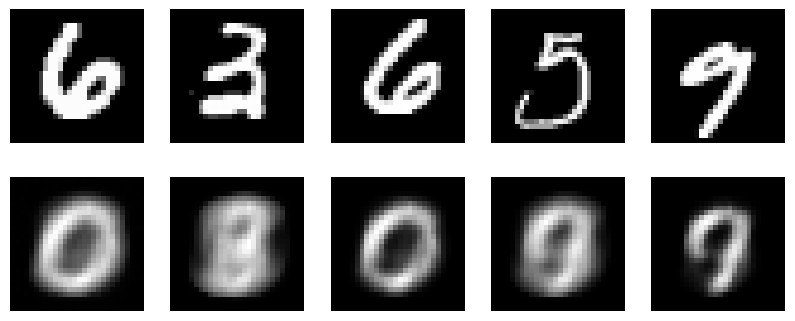

Epoch [4/5], Step [0/938], Loss: 0.0595
Epoch [4/5], Step [100/938], Loss: 0.0655
Epoch [4/5], Step [200/938], Loss: 0.0567
Epoch [4/5], Step [300/938], Loss: 0.0513
Epoch [4/5], Step [400/938], Loss: 0.0565
Epoch [4/5], Step [500/938], Loss: 0.0554
Epoch [4/5], Step [600/938], Loss: 0.0592
Epoch [4/5], Step [700/938], Loss: 0.0504
Epoch [4/5], Step [800/938], Loss: 0.0501
Epoch [4/5], Step [900/938], Loss: 0.0491
Epoch [4/5] completed with average loss: 0.0547


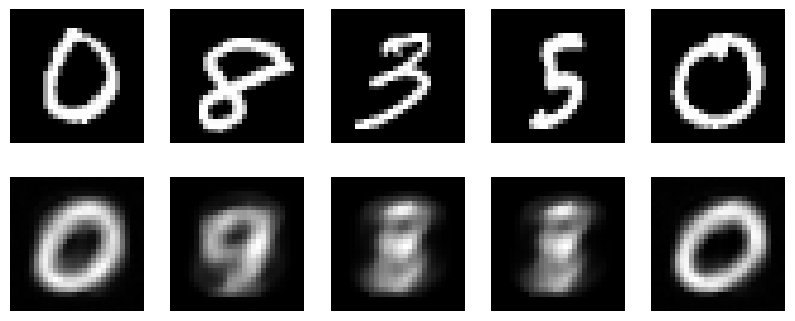

Epoch [5/5], Step [0/938], Loss: 0.0484
Epoch [5/5], Step [100/938], Loss: 0.0548
Epoch [5/5], Step [200/938], Loss: 0.0529
Epoch [5/5], Step [300/938], Loss: 0.0535
Epoch [5/5], Step [400/938], Loss: 0.0499
Epoch [5/5], Step [500/938], Loss: 0.0540
Epoch [5/5], Step [600/938], Loss: 0.0512
Epoch [5/5], Step [700/938], Loss: 0.0486
Epoch [5/5], Step [800/938], Loss: 0.0510
Epoch [5/5], Step [900/938], Loss: 0.0521
Epoch [5/5] completed with average loss: 0.0524


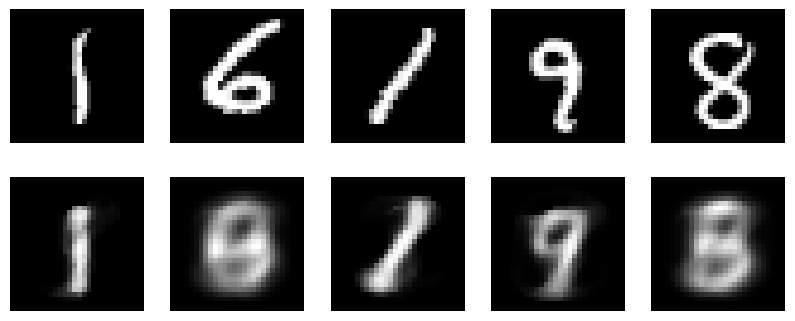

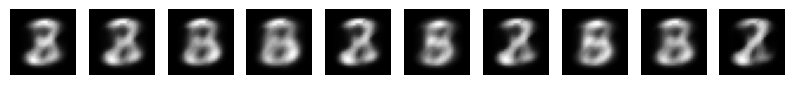

In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from utils import *

def initialize_weights(input_dim, hidden_dim1, hidden_dim2, code_dim):
    """
    Initialize the weights and biases for an autoencoder.

    Args:
    input_dim (int): Dimension of the input layer.
    hidden_dim1 (int): Dimension of the first hidden layer.
    hidden_dim2 (int): Dimension of the second hidden layer.
    code_dim (int): Dimension of the latent code layer.

    Returns:
    dict: Dictionary containing initialized weights and biases.
    """
    weights = {
        # encoder weights and biases
        'W1': torch.randn(input_dim, hidden_dim1, device=device) * 0.01,
        'b1': torch.zeros(1, hidden_dim1, device=device),
        'W2': torch.randn(hidden_dim1, hidden_dim2, device=device) * 0.01,
        'b2': torch.zeros(1, hidden_dim2, device=device),
        'W3': torch.randn(hidden_dim2, code_dim, device=device) * 0.01,
        'b3': torch.zeros(1, code_dim, device=device),

        # decoder weights and biases
        'W4': torch.randn(code_dim, hidden_dim2, device=device) * 0.01,
        'b4': torch.zeros(1, hidden_dim2, device=device),
        'W5': torch.randn(hidden_dim2, hidden_dim1, device=device) * 0.01,
        'b5': torch.zeros(1, hidden_dim1, device=device),
        'W6': torch.randn(hidden_dim1, input_dim, device=device) * 0.01,
        'b6': torch.zeros(1, input_dim, device=device),
    }
    return weights

class Autoencoder:
    """
    The Autoencoder class.

    Attributes:
    weights (dict): Dictionary containing weights and biases.
    """
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, code_dim):
        """
        Initialize the Autoencoder.

        Args:
        input_dim (int): Dimension of the input layer.
        hidden_dim1 (int): Dimension of the first hidden layer.
        hidden_dim2 (int): Dimension of the second hidden layer.
        code_dim (int): Dimension of the latent code layer.
        """
        self.weights = initialize_weights(input_dim, hidden_dim1, hidden_dim2, code_dim)
        # initialize the gradients
        self.grads = {key: torch.zeros_like(value) for key, value in self.weights.items()}

    def forward(self, x):
        """
        Forward pass through the autoencoder.

        Args:
        x (torch.Tensor): Input tensor.

        Returns:
        torch.Tensor: Reconstructed output tensor.
        """
        # Encoder layer
        self.x = x
        self.z1 = torch.matmul(self.x, self.weights['W1']) + self.weights['b1']
        self.h1 = relu(self.z1)
        self.z2 = torch.matmul(self.h1, self.weights['W2']) + self.weights['b2']
        self.h2 = relu(self.z2)
        self.z3 = torch.matmul(self.h2, self.weights['W3']) + self.weights['b3']
        self.code = relu(self.z3)

        # Decoder layer
        self.z4 = torch.matmul(self.code, self.weights['W4']) + self.weights['b4']
        self.h3 = relu(self.z4)
        self.z5 = torch.matmul(self.h3, self.weights['W5']) + self.weights['b5']
        self.h4 = relu(self.z5)
        self.z6 = torch.matmul(self.h4, self.weights['W6']) + self.weights['b6']
        self.output = sigmoid(self.z6)

        return self.output

    def backward(self, loss_grad):
        """
        Backward pass through the autoencoder.

        Args:
        loss_grad (torch.Tensor): Gradient of the loss with respect to the output.
        """
        # Derivative at the output layer (sigmoid)
        d_z6 = loss_grad * sigmoid_derivative(self.output)
        self.grads['W6'] += torch.matmul(self.h4.t(), d_z6)
        self.grads['b6'] += torch.sum(d_z6, dim=0, keepdim=True)

        # Backprop through h4
        d_h4 = torch.matmul(d_z6, self.weights['W6'].t())
        d_z5 = d_h4 * relu_derivative(self.z5)
        self.grads['W5'] += torch.matmul(self.h3.t(), d_z5)
        self.grads['b5'] += torch.sum(d_z5, dim=0, keepdim=True)

        # Backprop through h3
        d_h3 = torch.matmul(d_z5, self.weights['W5'].t())
        d_z4 = d_h3 * relu_derivative(self.z4)
        self.grads['W4'] += torch.matmul(self.code.t(), d_z4)
        self.grads['b4'] += torch.sum(d_z4, dim=0, keepdim=True)

        # Backprop through code layer
        d_code = torch.matmul(d_z4, self.weights['W4'].t())
        d_z3 = d_code * relu_derivative(self.z3)
        self.grads['W3'] += torch.matmul(self.h2.t(), d_z3)
        self.grads['b3'] += torch.sum(d_z3, dim=0, keepdim=True)

        # Backprop through h2
        d_h2 = torch.matmul(d_z3, self.weights['W3'].t())
        d_z2 = d_h2 * relu_derivative(self.z2)
        self.grads['W2'] += torch.matmul(self.h1.t(), d_z2)
        self.grads['b2'] += torch.sum(d_z2, dim=0, keepdim=True)

        # Backprop through h1
        d_h1 = torch.matmul(d_z2, self.weights['W2'].t())
        d_z1 = d_h1 * relu_derivative(self.z1)
        self.grads['W1'] += torch.matmul(self.x.t(), d_z1)
        self.grads['b1'] += torch.sum(d_z1, dim=0, keepdim=True)

    def zero_grads(self):
        """
        Zero out the gradients.
        """
        for key in self.grads:
            self.grads[key].zero_()

    def update_params(self, lr):
        """
        Update the weights and biases using the computed gradients.

        Args:
        lr (float): Learning rate.
        """
        for key in self.weights:
            self.weights[key] -= lr * self.grads[key]

    def decode(self, code):
        z4 = torch.matmul(code, self.weights['W4']) + self.weights['b4']
        h3 = relu(z4)
        z5 = torch.matmul(h3, self.weights['W5']) + self.weights['b5']
        h4 = relu(z5)
        z6 = torch.matmul(h4, self.weights['W6']) + self.weights['b6']
        output = sigmoid(z6)
        return output

def load_mnist():
    """
    Load the MNIST dataset with custom preprocessing.

    Returns:
    torch DataLoader: DataLoader for the MNIST dataset.
    """

    train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    return train_loader

def mse_loss(output, target):
    """
    Compute the Mean Squared Error loss.

    Args:
    output (torch.Tensor): Predicted outputs.
    target (torch.Tensor): Ground truth inputs.

    Returns:
    torch.Tensor: Mean Squared Error loss.
    """
    return torch.mean((output - target) ** 2)

def mse_loss_derivative(output, target):
    """
    Compute the derivative of the Mean Squared Error loss with respect to the output.

    Args:
    output (torch.Tensor): Predicted outputs.
    target (torch.Tensor): Ground truth inputs.

    Returns:
    torch.Tensor: Derivative of the loss with respect to the output.
    """
    return (2 * (output - target)) / output.size(0)

def generate_image(autoencoder, code_dim, num_images=10):
    autoencoder.weights['W4'].requires_grad = False
    autoencoder.weights['W5'].requires_grad = False
    autoencoder.weights['W6'].requires_grad = False

    with torch.no_grad():
        # Sample random latent codes from a normal distribution
        codes = torch.randn(num_images, code_dim).to(device)
        generated = autoencoder.decode(codes)
        return generated

def visualize_generated_images(generated_data, n=5):
    generated_images = generated_data.view(-1, 28, 28).cpu().detach()
    fig, axes = plt.subplots(1, n, figsize=(10, 2))
    for i in range(n):
        axes[i].imshow(generated_images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

def visualize_results(original_data, reconstructed_data, n=5):
    """
    Visualize original and reconstructed images.

    Args:
    original_data (torch.Tensor): Original input images.
    reconstructed_data (torch.Tensor): Reconstructed images from the autoencoder.
    n (int): Number of images to display.
    """
    original_images = original_data.view(-1, 28, 28).cpu().detach()
    reconstructed_images = reconstructed_data.view(-1, 28, 28).cpu().detach()
    fig, axes = plt.subplots(2, n, figsize=(10, 4))
    for i in range(n):
        # Original images
        axes[0, i].imshow(original_images[i], cmap='gray')
        axes[0, i].axis('off')
        # Reconstructed images
        axes[1, i].imshow(reconstructed_images[i], cmap='gray')
        axes[1, i].axis('off')
    plt.show()

def train(autoencoder, data_loader, num_epochs=5, lr=0.01):
    """
    Train the Autoencoder model.

    Args:
    autoencoder (Autoencoder): The autoencoder model.
    data_loader (torch.utils.data.DataLoader): DataLoader for the dataset.
    num_epochs (int): Number of training epochs.
    lr (float): Learning rate.
    """
    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch_idx, (images, _) in enumerate(data_loader):
            # Prepare input data and move to device
            inputs = images.view(-1, 28*28).to(device)

            # Forward pass
            outputs = autoencoder.forward(inputs)
            loss = mse_loss(outputs, inputs)
            epoch_loss += loss.item()

            # Backward pass
            autoencoder.zero_grads()
            loss_grad = mse_loss_derivative(outputs, inputs)
            autoencoder.backward(loss_grad)

            # parameter update
            autoencoder.update_params(lr)

            if batch_idx % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(data_loader)}], Loss: {loss.item():.4f}")

        avg_loss = epoch_loss / len(data_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}] completed with average loss: {avg_loss:.4f}")

        #visualize
        visualize_results(inputs, outputs)
if __name__ == "__main__":
    # Hyperparameters
    input_dim = 784        # Input dimension (28x28 images flattened)
    hidden_dim1 = 128      # First hidden layer size
    hidden_dim2 = 64       # Second hidden layer size
    code_dim = 32          # Latent code dimension
    num_epochs = 5         # Number of training epochs
    learning_rate = 0.01   # Learning rate

    # Instantiate the Autoencoder
    autoencoder = Autoencoder(input_dim, hidden_dim1, hidden_dim2, code_dim)

    # important: move weights to device
    for key in autoencoder.weights:
        autoencoder.weights[key] = autoencoder.weights[key].to(device)
    for key in autoencoder.grads:
        autoencoder.grads[key] = autoencoder.grads[key].to(device)

    # Load data
    data_loader = load_mnist()

    # Train the Autoencoder
    train(autoencoder, data_loader, num_epochs=num_epochs, lr=learning_rate)
    generated_images = generate_image(autoencoder, code_dim=code_dim)
    visualize_generated_images(generated_images, n=10)

We can see from a basic example that our images are still quite blurry. For better results, we can of course use a more advanced network, like a Variational Autoencoder (which considers the input data as being sampled from a probability distribution), or a Stable Diffusion model.